In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv("survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "OrgSize"]).dropna()

df["MainBranch"] = df["MainBranch"].str.replace("I am not primarily a developer, but I write code sometimes as part of my work","I am not primarily a developer, but I \nwrite code sometimes as part of my work")
df["MainBranch"] = df["MainBranch"].str.replace('I used to be a developer by profession, but no longer am','I used to be a developer by profession, \nbut no longer am')

df["MainBranch"] = df["MainBranch"].astype("category")
df["OrgSize"] = df["OrgSize"].astype("category")

df.head()

,MainBranch,OrgSize
Respondent,,
3,"I am not primarily a developer, but I \nwrite ...",100 to 499 employees
4,I am a developer by profession,100 to 499 employees
5,I am a developer by profession,"10,000 or more employees"
7,I am a developer by profession,"Just me - I am a freelancer, sole proprietor, ..."
9,I am a developer by profession,10 to 19 employees


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71585 entries, 3 to 88883
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MainBranch  71585 non-null  category
 1   OrgSize     71585 non-null  category
dtypes: category(2)
memory usage: 699.6 KB


In [4]:
df_1 = df.groupby(["OrgSize", "MainBranch"]).size().to_frame(name='count').reset_index()
df_1["OrgSize"] = df_1["OrgSize"].str.replace("Just me - I am a freelancer, sole proprietor, etc.","1 Just me - I am a freelancer,\nsole proprietor, etc.")
df_1.head()

,OrgSize,MainBranch,count
0,"1,000 to 4,999 employees",I am a developer by profession,6352
1,"1,000 to 4,999 employees","I am not primarily a developer, but I \nwrite ...",910
2,"1,000 to 4,999 employees",I code primarily as a hobby,95
3,"1,000 to 4,999 employees","I used to be a developer by profession, \nbut ...",148
4,10 to 19 employees,I am a developer by profession,6167


In [5]:
# top_countries = df_1.groupby("OrgSize").sum().sort_values(by="count", ascending=False)
# lists = list(top_countries.index)

lists = list(df_1["OrgSize"].unique())
lists

['1,000 to 4,999 employees',
 '10 to 19 employees',
 '10,000 or more employees',
 '100 to 499 employees',
 '2-9 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 '1 Just me - I am a freelancer,\nsole proprietor, etc.']

In [6]:
df_1.groupby("OrgSize").get_group(lists[0])

,OrgSize,MainBranch,count
0,"1,000 to 4,999 employees",I am a developer by profession,6352
1,"1,000 to 4,999 employees","I am not primarily a developer, but I \nwrite ...",910
2,"1,000 to 4,999 employees",I code primarily as a hobby,95
3,"1,000 to 4,999 employees","I used to be a developer by profession, \nbut ...",148


In [7]:
# df_2 = pd.DataFrame()
# for i in range(0,len(lists)):
#     data_2 = df_1.groupby("OrgSize").get_group(lists[i])
#     df_2 = df_2.append(data_2)
    
# # df_2["OrgSize"] = df["OrgSize"].str.replace("Just me - I am a freelancer, sole proprietor, etc.","1 Just me - I am a freelancer, sole proprietor, etc.")

# df_2.head()

In [8]:
# df_1.groupby("OrgSize")["count"].sum().sort_values(ascending=False)
# df_1["OrgSize"].unique()

In [9]:
df_2_1 = df_1.groupby("OrgSize")["count"].sum().sort_values(ascending=False).to_frame()
b = []
for i in range(0,len(df_2_1.index)):
    a = df_2_1.index.str.split(" ")[i][0]
    a = a.replace(",","")
    a = a.replace("-",".")
    b.append(float(a))
df_2_1["b"] = b  
df_2_1 = df_2_1.sort_values(by="b", ascending=False)

df_2_1

,count,b
OrgSize,,
"10,000 or more employees",10125,10000.0
"5,000 to 9,999 employees",2975,5000.0
"1,000 to 4,999 employees",7505,1000.0
500 to 999 employees,4559,500.0
100 to 499 employees,12800,100.0
20 to 99 employees,15172,20.0
10 to 19 employees,6753,10.0
2-9 employees,7369,2.9
"1 Just me - I am a freelancer,\nsole proprietor, etc.",4327,1.0


In [10]:
df_2_2 = df_2_1["count"].to_frame(name='count').reset_index()
df_2_2["percent"] = round((100.*df_2_2["count"]/df_2_2["count"].sum()),1)
df_2_2

# df_2_2 = df_2_1["count"]
# df_2_2

,OrgSize,count,percent
0,"10,000 or more employees",10125,14.1
1,"5,000 to 9,999 employees",2975,4.2
2,"1,000 to 4,999 employees",7505,10.5
3,500 to 999 employees,4559,6.4
4,100 to 499 employees,12800,17.9
5,20 to 99 employees,15172,21.2
6,10 to 19 employees,6753,9.4
7,2-9 employees,7369,10.3
8,"1 Just me - I am a freelancer,\nsole proprieto...",4327,6.0


In [11]:
df_2_3 = df_1.groupby("MainBranch")["count"].sum().sort_values(ascending=False).to_frame(name='count').reset_index()
df_2_3["percent"] = round((100.*df_2_3["count"]/df_2_3["count"].sum()),1)
df_2_3

,MainBranch,count,percent
0,I am a developer by profession,62268,87.0
1,"I am not primarily a developer, but I \nwrite ...",6847,9.6
2,I code primarily as a hobby,1264,1.8
3,"I used to be a developer by profession, \nbut ...",1206,1.7


In [12]:
df_3 = df_1.pivot_table(index="MainBranch", columns="OrgSize", values="count")
df_3 = df_3.reindex(df_2_2["OrgSize"], axis=1)  
df_3

OrgSize,"10,000 or more employees","5,000 to 9,999 employees","1,000 to 4,999 employees",500 to 999 employees,100 to 499 employees,20 to 99 employees,10 to 19 employees,2-9 employees,"1 Just me - I am a freelancer,\nsole proprietor, etc."
MainBranch,,,,,,,,,
I am a developer by profession,8321,2447,6352,3905,11336,13779,6167,6569,3392
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",1418,435,910,496,1107,1041,416,561,463
I code primarily as a hobby,169,38,95,70,150,149,90,153,350
"I used to be a developer by profession, \nbut no longer am",217,55,148,88,207,203,80,86,122


In [13]:
df_3_per = round(((df_3 / df_1['count'].sum())*100),1)
df_3_1 = df_3.astype(str) + '\n' + '(' + df_3_per.astype(str) + ' %)'
df_3_1

OrgSize,"10,000 or more employees","5,000 to 9,999 employees","1,000 to 4,999 employees",500 to 999 employees,100 to 499 employees,20 to 99 employees,10 to 19 employees,2-9 employees,"1 Just me - I am a freelancer,\nsole proprietor, etc."
MainBranch,,,,,,,,,
I am a developer by profession,8321\n(11.6 %),2447\n(3.4 %),6352\n(8.9 %),3905\n(5.5 %),11336\n(15.8 %),13779\n(19.2 %),6167\n(8.6 %),6569\n(9.2 %),3392\n(4.7 %)
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",1418\n(2.0 %),435\n(0.6 %),910\n(1.3 %),496\n(0.7 %),1107\n(1.5 %),1041\n(1.5 %),416\n(0.6 %),561\n(0.8 %),463\n(0.6 %)
I code primarily as a hobby,169\n(0.2 %),38\n(0.1 %),95\n(0.1 %),70\n(0.1 %),150\n(0.2 %),149\n(0.2 %),90\n(0.1 %),153\n(0.2 %),350\n(0.5 %)
"I used to be a developer by profession, \nbut no longer am",217\n(0.3 %),55\n(0.1 %),148\n(0.2 %),88\n(0.1 %),207\n(0.3 %),203\n(0.3 %),80\n(0.1 %),86\n(0.1 %),122\n(0.2 %)


In [14]:
df_4 = df_1.pivot_table(index="OrgSize", columns="MainBranch", values="count")
df_4 = df_4.reindex(df_2_2["OrgSize"], axis=0)
df_4

MainBranch,I am a developer by profession,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
OrgSize,,,,
"10,000 or more employees",8321,1418,169,217
"5,000 to 9,999 employees",2447,435,38,55
"1,000 to 4,999 employees",6352,910,95,148
500 to 999 employees,3905,496,70,88
100 to 499 employees,11336,1107,150,207
20 to 99 employees,13779,1041,149,203
10 to 19 employees,6167,416,90,80
2-9 employees,6569,561,153,86
"1 Just me - I am a freelancer,\nsole proprietor, etc.",3392,463,350,122


In [15]:
df_4_per = round(((df_4 / df_1['count'].sum())*100),1)
# df_4_per = round(((df_4 / df_4.sum().sum())*100),2)
df_4_1 = df_4.astype(str) + '\n' + '(' + df_4_per.astype(str) + ' %)'
df_4_1

# df_4_1 = df_3_1.transpose()
# df_4_1

MainBranch,I am a developer by profession,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
OrgSize,,,,
"10,000 or more employees",8321\n(11.6 %),1418\n(2.0 %),169\n(0.2 %),217\n(0.3 %)
"5,000 to 9,999 employees",2447\n(3.4 %),435\n(0.6 %),38\n(0.1 %),55\n(0.1 %)
"1,000 to 4,999 employees",6352\n(8.9 %),910\n(1.3 %),95\n(0.1 %),148\n(0.2 %)
500 to 999 employees,3905\n(5.5 %),496\n(0.7 %),70\n(0.1 %),88\n(0.1 %)
100 to 499 employees,11336\n(15.8 %),1107\n(1.5 %),150\n(0.2 %),207\n(0.3 %)
20 to 99 employees,13779\n(19.2 %),1041\n(1.5 %),149\n(0.2 %),203\n(0.3 %)
10 to 19 employees,6167\n(8.6 %),416\n(0.6 %),90\n(0.1 %),80\n(0.1 %)
2-9 employees,6569\n(9.2 %),561\n(0.8 %),153\n(0.2 %),86\n(0.1 %)
"1 Just me - I am a freelancer,\nsole proprietor, etc.",3392\n(4.7 %),463\n(0.6 %),350\n(0.5 %),122\n(0.2 %)


<h1 style='color:red'>FUNCTIONS</h1>

In [16]:
######################
# ax1 (top)
######################
def total_bar_graph_annotate(df):
    for idx, acc in enumerate(list(df.columns)): 
        value=df[acc].sum()
        percent = f"({value} - {value*100/df_1['count'].sum():1.1f}%)" 
#         percent = f"({value} - {value*100/df.sum().sum():1.1f}%)" 
        ax1.annotate(percent, xy=(value+300, idx), xycoords="data",   
                        va='center', ha='left', rotation=0)
    
######################
# ax2 (bottom-left)
######################
def table_customization (table, df, index, columns, min, max):
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    cellDict = table.get_celld()

    for i in range(0,len(index)):
        for j in range(0,len(columns)):
            if i==0:
                cellDict[(i,j)].set_height(0.07)
                cellDict[(i,j)].set_width(0.10)

    for i in range(1,len(index)+1):
        cellDict[(i,-1)].set_height(0.17)
        cellDict[(i,-1)].set_width(0.30)
        cellDict[(i,-1)].set_fontsize(10)
        cellDict[(i,-1)].set_text_props(weight='bold', color='k')
        for j in range(0,len(columns)):
            cellDict[(i,j)].set_height(0.17)
            if (i%2 == 0):
                cellDict[(i,j)].set_facecolor('gainsboro')
            else:
                cellDict[(i,j)].set_facecolor('w')

        for i,[j,k] in enumerate(df.iterrows(), start=1):
            for m, l in enumerate(k):
                if (l<min):
                    cellDict[(i,m)].set_facecolor('y')
                elif l>max:
                    cellDict[(i,m)].set_facecolor('g')

######################
# ax3 (bottom-middle)
######################
def autopct(pct, allvals):
    if pct<5:
        return ""
    else:
        absolute = int(pct/100.*sum(allvals))
        return "{p:.1f}%".format(p=pct)
#         return "{p:.1f}% \n({val})".format(p=pct, val=absolute)              
                
def pie_annotate(ax, df, wedges, angleA, x1, y1):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", ha="center")

    df_filt = df[(df["count"] != 0) & (df["percent"]<5)]
    values = [f"{i:1.1f}%" for i,j in zip(df["percent"], df["count"])]

    for i, p in enumerate(wedges):
        if i in df_filt.index:
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA={angleA},angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(values[i], xy=(x, y), xytext=(x1*np.sign(x), y1*y),
                        horizontalalignment=horizontalalignment, **kw)

<h1 style='color:red'>GRAPH-1</h1>

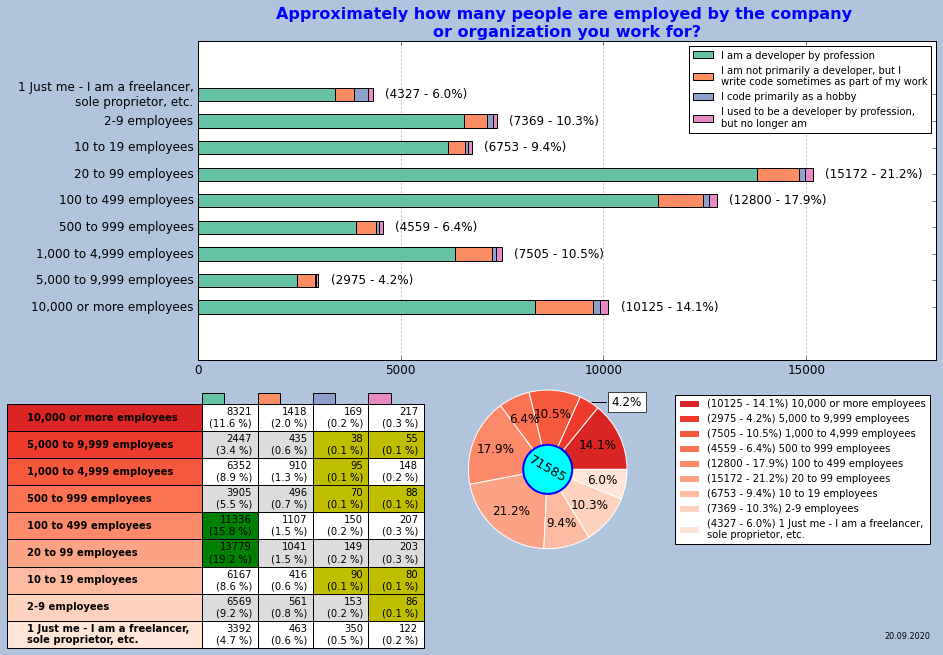

In [29]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(13,9), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "20.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1, 1, 1.2]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_3.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_3.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_3.columns)))
cmap = plt.get_cmap("Set2")
colors_column = []
for i in range(0,len(df_4.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_3)):
    ax1.barh(index, df_3.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3, align='center')
    y_offset = y_offset + df_3.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

total_bar_graph_annotate(df_3)
######################
# ax2 (bottom-left)
######################
df_4_empty_col = [""]*(len(df_4.columns)+1)
table_1 = ax2.table(cellText=df_4_1.values, rowLabels=df_4.index, colLabels=df_4_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_1, df=df_4, index=df_4.index, columns=df_4.columns, min=100, max=10000) #------function
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_2_2["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_2_2["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_2_2, wedges, 180, 1, 1) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_4.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)  
######################
# ax4 (bottom-right)
######################
labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_2_2["OrgSize"], df_2_2["percent"], df_2_2["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_3.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Approximately how many people are employed by the company \nor organization you work for?", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_3.columns)))
ax1.set_yticklabels(df_3.columns, fontsize=12)
ax1.set_xlim([0, int(df_2_2["count"].max())*1.20])
# ax1.invert_yaxis()
ax2.axis("off")
ax3.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()

<h1 style='color:red'>GRAPHS-2</h1>

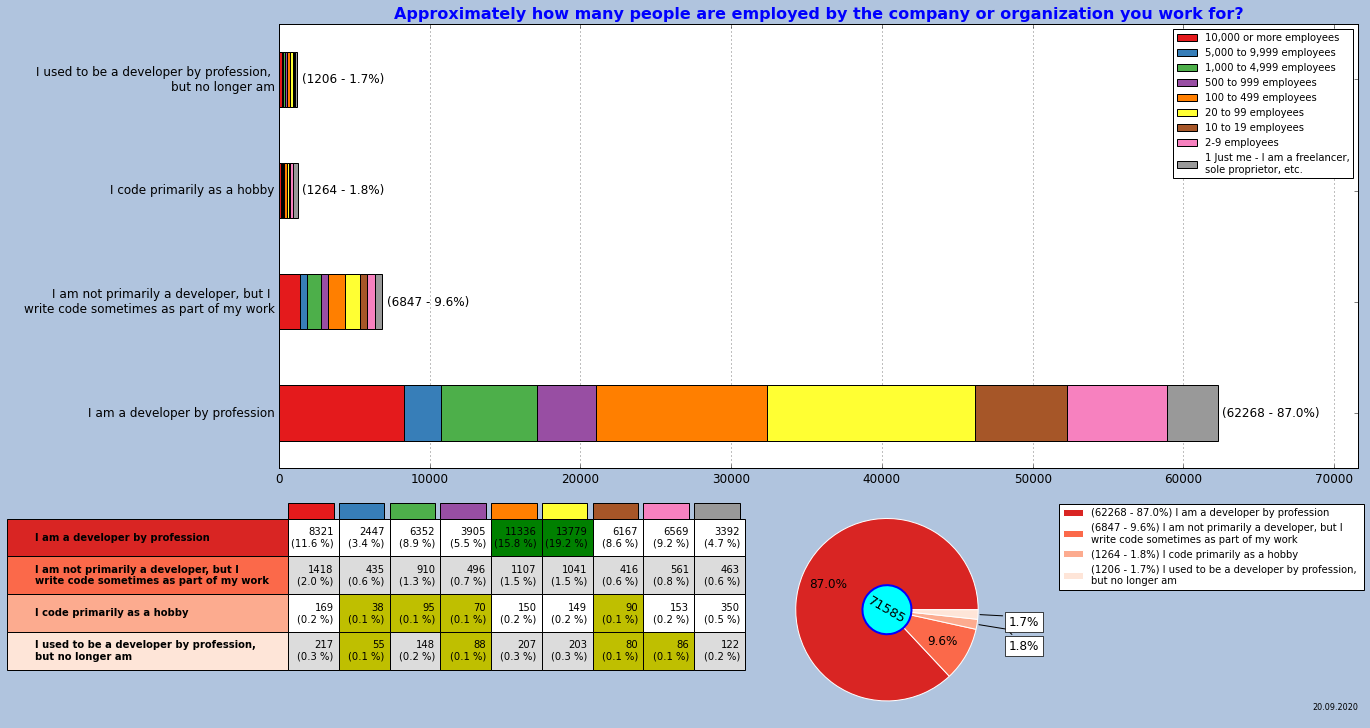

In [18]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(19,10), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "20.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.8, 1, 1.2]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_4.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_4.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_4.columns)))
cmap = plt.get_cmap("Set1")    
colors_column = []
for i in range(0,len(df_3.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_4)):
    ax1.barh(index, df_4.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_4.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

total_bar_graph_annotate(df_4)
######################
# ax2 (bottom-left)
######################
df_3_empty_col = [""]*(len(df_3.columns)+1)
table_2 = ax2.table(cellText=df_3_1.values, rowLabels=df_3.index, colLabels=df_3_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_2, df=df_3, index=df_3.index, columns=df_3.columns, min=100, max=10000) #------function
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_2_3["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_2_3["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_2_3, wedges, 135, 1.5, 2.5) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)    

######################
# ax4 (bottom-right)
######################
labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_2_3["MainBranch"], df_2_3["percent"], df_2_3["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_4.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Approximately how many people are employed by the company or organization you work for?", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_4.columns)))
ax1.set_yticklabels(df_4.columns, fontsize=12)
ax1.set_xlim([0, int(df_2_3["count"].max())*1.15])
ax2.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()